## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы: 

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации. 
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта. 

# *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8. 

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)



In [114]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [120]:
df = pd.read_csv('data/df_out.csv')
print (df_out.shape)
df.head(5)

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Приведение типов в чтении данных
Решил сразу прочитать данные в нужном формате

In [335]:
df_dtypechange = pd.read_csv('data/df_out.csv',usecols = ['id','price','year','fuel','posting_date'], \
                 dtype = {'price':float,'year':'Int64','fuel':'category'}, parse_dates = ['posting_date'])
df_dtypechange.posting_date = pd.to_datetime(df_dtypechange.posting_date,utc=True)
df_dtypechange

,id,price,year,fuel,posting_date
0,7308295377,54990.0,2020,diesel,2021-04-17 16:30:50+00:00
1,7316380095,16942.0,2016,NaN,2021-05-03 19:40:21+00:00
2,7313733749,35590.0,2017,gas,2021-04-28 10:52:20+00:00
3,7308210929,14500.0,2013,gas,2021-04-17 14:08:57+00:00
4,7316474668,21800.0,2021,gas,2021-05-03 22:32:06+00:00
...,...,...,...,...,...
9995,7304876387,4495.0,2002,gas,2021-04-10 20:33:57+00:00
9996,7316152972,14495.0,2008,gas,2021-05-03 13:36:30+00:00
9997,7310993818,8995.0,2011,gas,2021-04-22 19:14:01+00:00
9998,7306637427,31900.0,2015,hybrid,2021-04-14 14:14:42+00:00


In [337]:
print(df.dtypes)
print(df_dtypechange.dtypes)

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object
id                            int64
price                       float64
year                          Int64
fuel                       category
posting_date    datetime64[ns, UTC]
dtype: object


In [339]:
df_total = pd.merge(left=df.drop(columns=['price','year','posting_date','fuel']),right=df_dtypechange,on='id',how='outer')
df_total
print(df_total.shape)

(10000, 20)


In [341]:
print(df_total.dtypes)

id                              int64
url                            object
region                         object
region_url                     object
manufacturer                   object
model                          object
odometer                        int64
title_status                   object
transmission                   object
image_url                      object
description                    object
state                          object
lat                           float64
long                          float64
price_category                 object
date                           object
price                         float64
year                            Int64
fuel                         category
posting_date      datetime64[ns, UTC]
dtype: object


# *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


## Определение пропущенных значений, обработка пропусков

In [343]:
missing_values = ((df_total.isna().sum()/len(df_total))*100).sort_values()
missing_values

id                0.00
url               0.00
region            0.00
region_url        0.00
manufacturer      0.00
price             0.00
odometer          0.00
price_category    0.00
state             0.00
date              0.02
image_url         0.02
description       0.02
posting_date      0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

<Axes: >

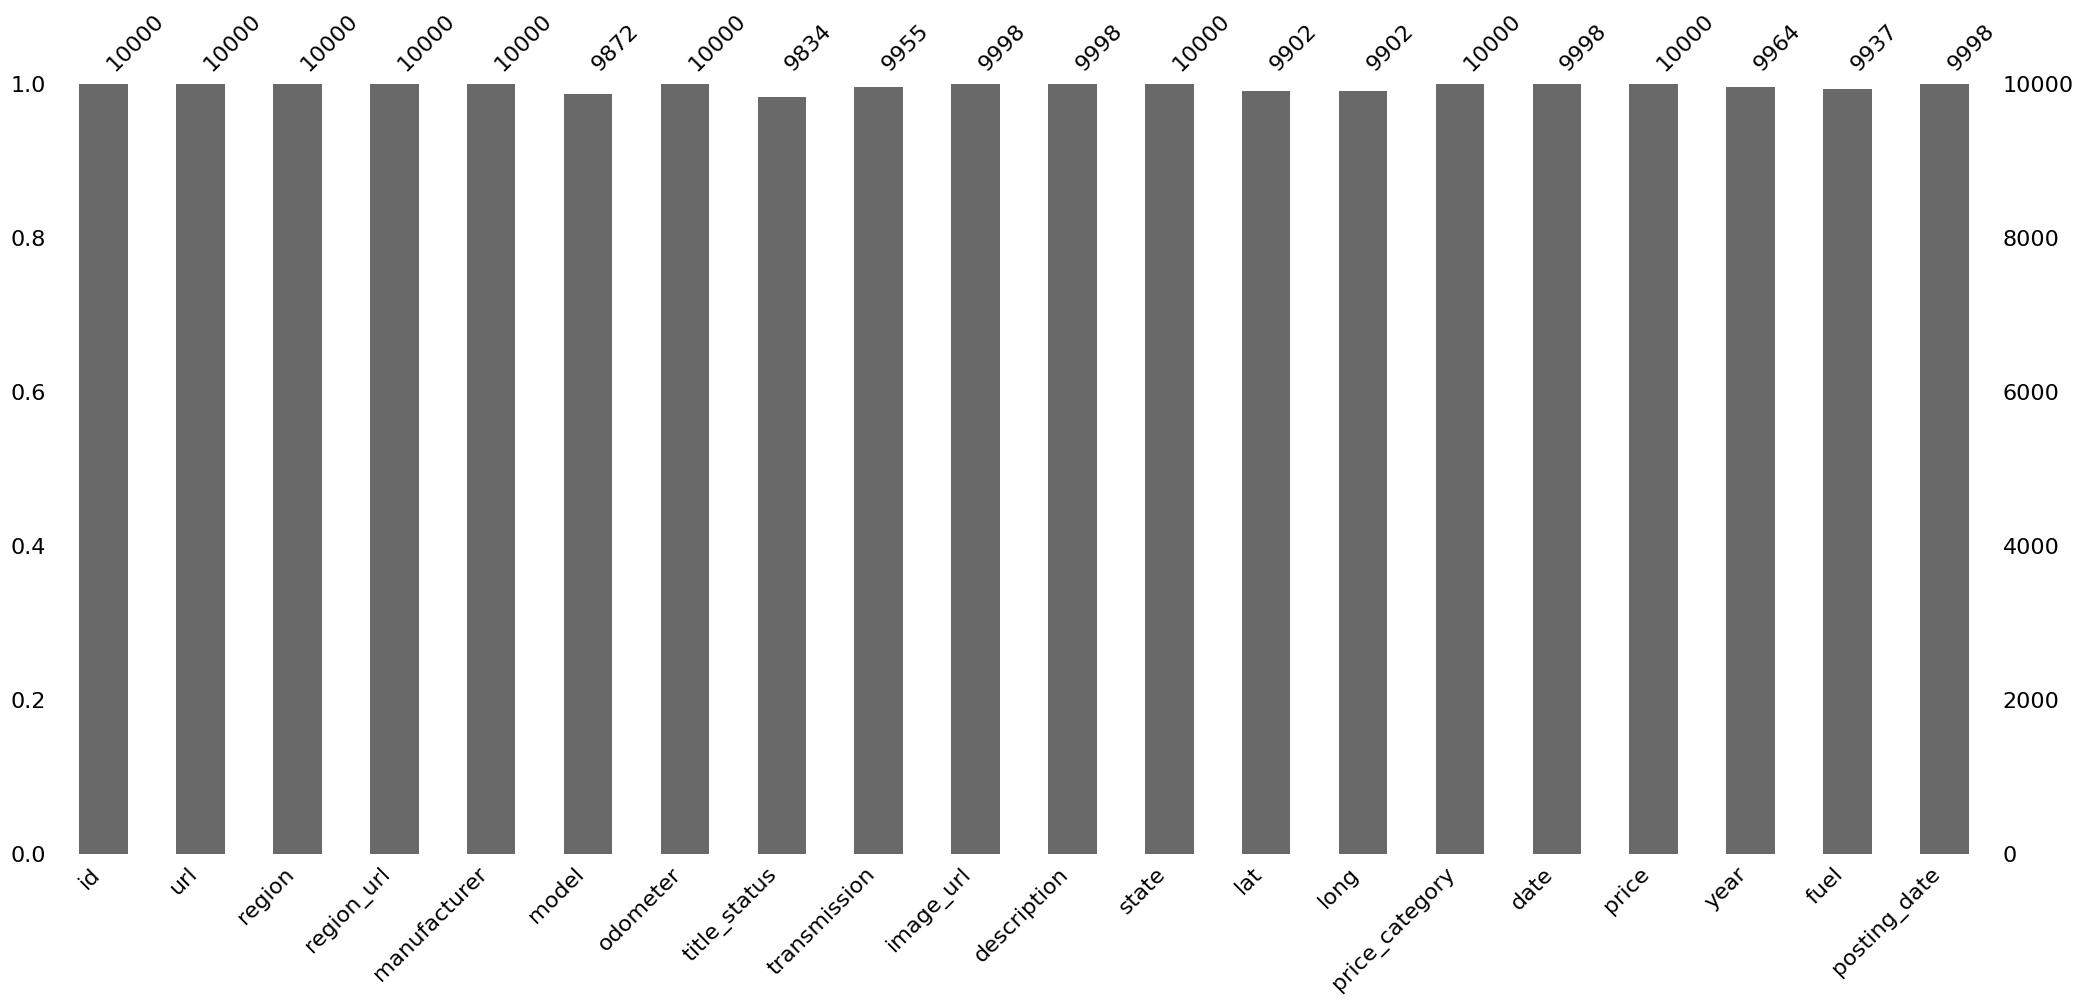

In [345]:
msno.bar(df_total)

In [347]:
df_clean = df_total.copy()
df_clean.shape

(10000, 20)

In [349]:
df_clean[df_clean.year.isna()] #можно взять 4 символа из описания автомобиля, но это можно сделать попозже, пока просто удалим эти данные

,id,url,region,region_url,manufacturer,model,odometer,title_status,transmission,image_url,description,state,lat,long,price_category,date,price,year,fuel,posting_date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,other,500,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,high,2021-04-09 13:31:03+00:00,35880.0,<NA>,gas,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,other,Super Duty F-350 SRW,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,high,2021-05-03 18:31:39+00:00,84995.0,<NA>,diesel,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,Grand Caravan,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,high,2021-05-02 07:11:33+00:00,43900.0,<NA>,NaN,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,other,olet Silverado 1500,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,high,2021-05-03 15:00:40+00:00,28498.0,<NA>,NaN,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,other,F-150,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,high,2021-05-04 18:11:22+00:00,60900.0,<NA>,gas,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,Odyssey,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,high,2021-04-24 16:41:06+00:00,67900.0,<NA>,gas,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,Grand Caravan,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,high,2021-04-14 16:51:36+00:00,38900.0,<NA>,NaN,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,other,CR-V,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,high,2021-04-20 18:46:55+00:00,24975.0,<NA>,gas,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,other,a Sienna,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,high,2021-04-28 16:12:14+00:00,47900.0,<NA>,gas,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,other,Transit Cargo Van,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,high,2021-04-07 21:10:06+00:00,35850.0,<NA>,gas,2021-04-07 21:10:06+00:00


In [351]:
def print_useful_rows_info(df):
    print ('количество полностью заполненных объектов из всей выборки:',len(df.dropna()))
    print ('процент полностью заполненных объектов из всей выборки:', round(len(df.dropna())/len(df)*100,2))
print_useful_rows_info(df_clean)

количество полностью заполненных объектов из всей выборки: 9507
процент полностью заполненных объектов из всей выборки: 95.07


In [353]:
 df_clean = df_clean[df_clean.year.notna()]
 df_clean.fuel = df_clean.fuel.fillna('other')
df_clean.model = df_clean.model.fillna('other')
df_clean['title_status'] = df_clean['title_status'].fillna(df_clean['title_status'].mode()[0])
df_clean['transmission'] = df_clean['transmission'].fillna(df_clean['transmission'].mode()[0])
#df = df[df.posting_date.notna()]
df_clean.shape

(9964, 20)

In [355]:
print_useful_rows_info(df_clean)

количество полностью заполненных объектов из всей выборки: 9868
процент полностью заполненных объектов из всей выборки: 99.04


In [357]:
missing_values = ((df_clean.isna().sum()/len(df_clean))*100).sort_values()
missing_values

id                0.000000
year              0.000000
price             0.000000
date              0.000000
price_category    0.000000
state             0.000000
description       0.000000
fuel              0.000000
image_url         0.000000
title_status      0.000000
odometer          0.000000
model             0.000000
manufacturer      0.000000
region_url        0.000000
region            0.000000
url               0.000000
transmission      0.000000
posting_date      0.000000
lat               0.963468
long              0.963468
dtype: float64

### Визуализация и обработка аномалий

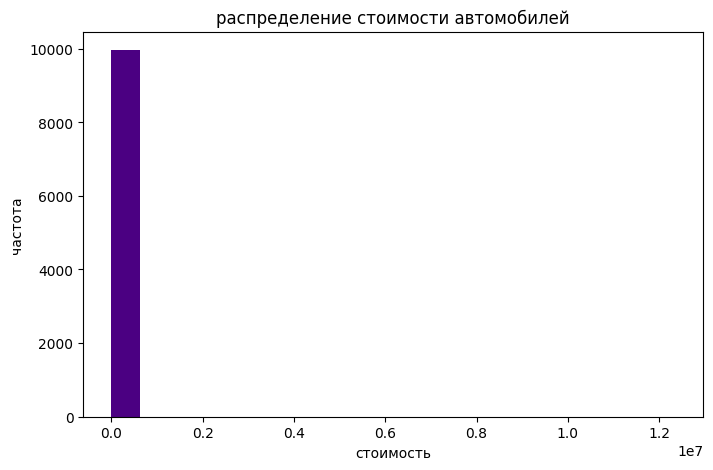

In [359]:
plt.figure(figsize=(8,5))
plt.hist(df_clean.price,bins=20,color='indigo')
plt.xlabel('стоимость')
plt.ylabel('частота')
plt.title('распределение стоимости автомобилей');

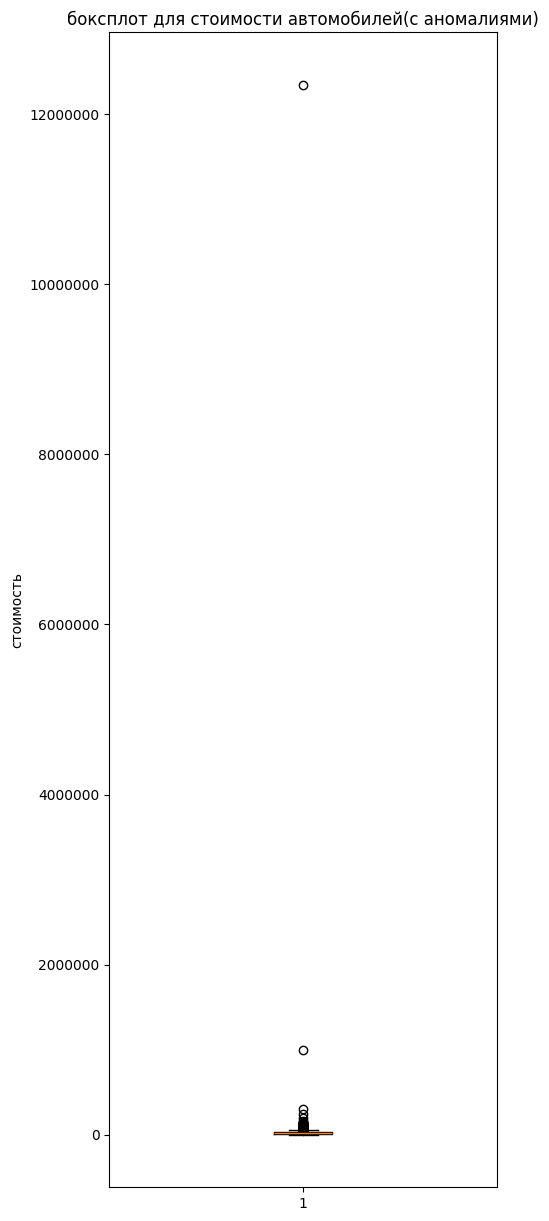

In [361]:
from matplotlib.ticker import FormatStrFormatter
fig,ax=plt.subplots(figsize=(5,15))
ax.boxplot(df_clean.price)
ax.set_ylabel('стоимость')
ax.set_title('боксплот для стоимости автомобилей(с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#df.price.describe().apply(lambda x:f"{x:0.3f}")

In [363]:
def calculate_outliers(data):
    q25=data.quantile(0.25)
    q75=data.quantile(0.75)
    iqr=q75-q25
    boundaries=(q25-1.5*iqr,q75+1.5*iqr)
    return boundaries
print('нижний порог нормальных значений',calculate_outliers(df_clean.price)[0],'минимальное значение',df_clean.price.min())
print('верхний порог нормальных значений',calculate_outliers(df_clean.price)[1],'максимальное значение',df_clean.price.max())


нижний порог нормальных значений -22235.0 минимальное значение 500.0
верхний порог нормальных значений 58125.0 максимальное значение 12345678.0


In [365]:
boundaries = calculate_outliers(df_clean.price)
is_outlier=(df_clean.price<boundaries[0])|(df_clean.price>boundaries[1])
is_outlier.sum()
df_new=df_clean[~is_outlier]
df_new.head()
print(df_new.shape)

(9757, 20)


In [379]:
boundaries_year = calculate_outliers(df_new.year)
boundaries_year
is_outlier = (df_new.year<boundaries_year[0])|(df_new.year>boundaries_year[1])
is_outlier.sum()
df_new.loc[is_outlier,'year'] = int(boundaries_year[0])

In [387]:
df_new.to_csv('data/df_clean_csv',index=False)
df_new.year.describe()

count         9757.0
mean     2011.569437
std          6.49422
min           1994.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

# 3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную 
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.